## Data

In [2]:
import pandas as pd

# Load data
claim_data = pd.read_csv('claim_data_group5_2024.csv')

# Check for missing values
print("Missing values:\n", claim_data.isnull().sum())

# Drop rows with missing values
claim_data = claim_data.dropna()

# Filter for non-negative ClaimNb and ClaimAmount
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] >= 0)]

# Display summary stats
print(claim_data[['ClaimNb', 'ClaimAmount']].describe())


Missing values:
 IDpol          0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
ClaimAmount    0
dtype: int64
             ClaimNb    ClaimAmount
count  100000.000000  100000.000000
mean        0.039020      76.599887
std         0.206296    1531.841302
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         4.000000  200000.000000


## Fit Frequency Distribution

Estimated Negative Binomial parameters:
Alpha (dispersion parameter): 0.43036134027589595
P (probability of success): 0.9168692986877907


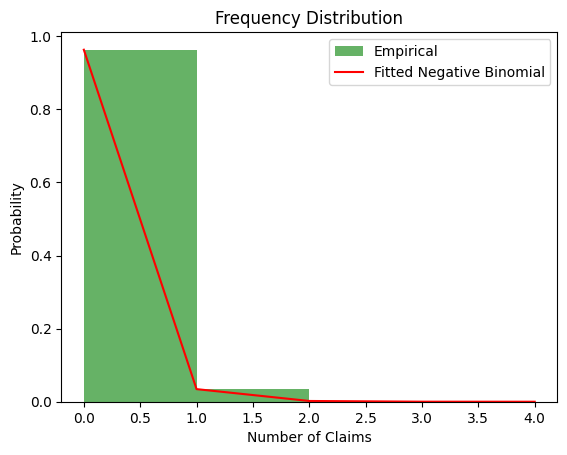

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data
claim_data = pd.read_csv('claim_data_group5_2024.csv')

# Drop rows with NAs
claim_data = claim_data.dropna()

# Filter non-negative values
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] >= 0)]

# Estimate frequency distribution (Negative Binomial)
claim_frequency = claim_data['ClaimNb']
mean_claim_freq = claim_frequency.mean()
var_claim_freq = claim_frequency.var()

# Estimate Negative Binomial parameters
alpha_est = mean_claim_freq**2 / (var_claim_freq - mean_claim_freq)
p_est = mean_claim_freq / var_claim_freq

# Print estimated parameters
print("Estimated Negative Binomial parameters:")
print("Alpha (dispersion parameter):", alpha_est)
print("P (probability of success):", p_est)

# Plot the empirical frequency distribution
plt.hist(claim_frequency, bins=range(0, int(claim_frequency.max()) + 1), density=True, alpha=0.6, color='g', label='Empirical')

# Plot the fitted Negative Binomial distribution
x = np.arange(0, int(claim_frequency.max()) + 1)
fitted_nb = stats.nbinom.pmf(x, alpha_est, p_est)
plt.plot(x, fitted_nb, 'r-', label='Fitted Negative Binomial')

plt.title('Frequency Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.legend()
plt.show()